In [1]:
! mkdir PLOTS-pyhep

mkdir: cannot create directory ‘PLOTS-pyhep’: File exists


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pre = pd.read_csv("~/storage/data/physicists/pyhep2020-preworkshop-survey.csv")
post = pd.read_csv("~/storage/data/physicists/pyhep2020-postworkshop-survey.csv")

In [4]:
pre.columns.tolist()

['Submitter',
 'Submitter Email',
 'Submission Date',
 'PyHEP feedback: Atlantic: 15:00 CET, 06:00 PDT, 18:30 IST, 22:00 JST',
 'PyHEP feedback: Pacific: 00:00 CET, 15:00 PDT, 03:30 IST, 07:00 JST',
 'PyHEP feedback: Indian Ocean: 09:00 CET, 00:00 PDT, 12:30 IST, 16:00 JST',
 'PyHEP feedback: In what country do you currently reside?',
 'PyHEP feedback: How did you hear about this workshop?',
 'PyHEP feedback: Do you want to clarify how you found out about this workshop?',
 'PyHEP feedback: What are you hoping to learn from this workshop?',
 'PyHEP feedback: Do you want to clarify what you are hoping to learn from this workshop?',
 'Personal demographics: What best describes your gender?',
 'Personal demographics: What is your country of origin?',
 'Personal demographics: If you like, you may describe your race or ethnicity here.',
 'Professional life: What best describes your occupation?',
 'Professional life: Do you want to clarify your occupation?',
 'Professional life: What best des

In [5]:
post.columns.tolist()

['Submitter',
 'Submitter Email',
 'Submission Date',
 'Correlation with the pre-workshop survey: Did you submit a response to the pre-workshop survey?',
 'Correlation with the pre-workshop survey: In what country or continent do you currently reside?',
 'Correlation with the pre-workshop survey: What best describes the stage of your professional career?',
 'Correlation with the pre-workshop survey: What operating system(s) run on the computer you most often use for work? Check all that apply.',
 'Correlation with the pre-workshop survey: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?',
 'PyHEP 2020 content: How would you rate the level of the talks, relative to your expectations?',
 'PyHEP 2020 content: Which talks/topics were presented in a way that was too basic?',
 'PyHEP 2020 content: Which talks/topics were presented in a way that was too advanced?',
 'PyHEP 2020 content: How would you rate the variety of topics, relative to your expectations?',
 

# Attempting to correlate pre- and post-workshop surveys

It didn't work, so no plots are based on it. You can ignore this whole section.

In [6]:
post["try_correlation"] = (post['Correlation with the pre-workshop survey: Did you submit a response to the pre-workshop survey?'] == "Yes")

In [7]:
country_mapping_for_correlation = lambda x: {
    "Australia": "Anywhere else in the world",
    "Austria": "Anywhere else in Europe (including Russia)",
    "Belarus": "Anywhere else in Europe (including Russia)",
    "Belgium": "Anywhere else in Europe (including Russia)",
    "Brasil": "South America",
    "Brazil": "South America",
    "CH": "Switzerland",
    "Canada": "Anywhere else in North America",
    "Canada (Montreal)": "Anywhere else in North America",
    "Canada (east)": "Anywhere else in North America",
    "China": "Anywhere else in Asia",
    "Colombia": "South America",
    "Czech Rep.": "Anywhere else in Europe (including Russia)",
    "Czech Republic": "Anywhere else in Europe (including Russia)",
    "Czech republic": "Anywhere else in Europe (including Russia)",
    "Czechia": "Anywhere else in Europe (including Russia)",
    "Denmark": "Anywhere else in Europe (including Russia)",
    "EGYPT": "Anywhere else in the world",
    "Ecuador": "South America",
    "Egypt": "Anywhere else in the world",
    "Finland": "Anywhere else in Europe (including Russia)",
    "France": "France",
    "France (CERN-based)": "France",
    "Germany": "Germany",
    "Greece": "Anywhere else in Europe (including Russia)",
    "Greeve": "Anywhere else in Europe (including Russia)",
    "Honduras": "South America",
    "Hungary": "Anywhere else in Europe (including Russia)",
    "INDIA": "India",
    "India": "India",
    "Indonesia": "Anywhere else in Asia",
    "Iran": "Anywhere else in Asia",
    "Italy": "Italy",
    "Japan": "Anywhere else in Asia",
    "Kuwait": "Anywhere else in the world",
    "MEXICO": "Anywhere else in North America",
    "Mexico": "Anywhere else in North America",
    "México": "Anywhere else in North America",
    "Netherlands": "Anywhere else in Europe (including Russia)",
    "Netherlands. Time slot also dependent on another conference. So need to be able to attend both.": "Anywhere else in Europe (including Russia)",
    "Oman": "Anywhere else in the world",
    "Osaka, Japan": "Anywhere else in Asia",
    "PHILIPPINES": "Anywhere else in Asia",
    "Pakistan": "Anywhere else in the world",
    "Peru": "South America",
    "Philippines": "Anywhere else in Asia",
    "Poland": "Anywhere else in Europe (including Russia)",
    "Portugal": "Anywhere else in Europe (including Russia)",
    "Republic of Korea": "Anywhere else in Asia",
    "Romania": "Anywhere else in Europe (including Russia)",
    "Russia": "Anywhere else in Europe (including Russia)",
    "Russia Federation": "Anywhere else in Europe (including Russia)",
    "S.KOREA": "Anywhere else in Asia",
    "Slovenia": "Anywhere else in Europe (including Russia)",
    "South Africa": "Anywhere else in the world",
    "South Korea": "Anywhere else in Asia",
    "Spain": "Anywhere else in Europe (including Russia)",
    "Stockholm": "Anywhere else in Europe (including Russia)",
    "Switzerland": "Switzerland",
    "Taiwan": "Anywhere else in Asia",
    "Taiwan (R.O.C.)": "Anywhere else in Asia",
    "Thailand": "Anywhere else in Asia",
    "The Netherlands": "Anywhere else in Europe (including Russia)",
    "U.S.": "United States",
    "U.S.A.": "United States",
    "UK": "United Kingdom",
    "US": "United States",
    "US (EST)": "United States",
    "USA": "United States",
    "USA (Chicago)": "United States",
    "USA - Michigan": "United States",
    "Ukraine": "Anywhere else in Europe (including Russia)",
    "United Kingdom": "United Kingdom",
    "United State": "United States",
    "United States": "United States",
    "United States of America": "United States",
    "United Status": "United States",
    "france": "France",
    "greece": "Anywhere else in Europe (including Russia)",
    "india": "India",
    "iran": "Anywhere else in the world",
    "italy": "Italy",
    "morocco": "Anywhere else in the world",
    "poland": "Anywhere else in Europe (including Russia)",
    "switzerland": "Switzerland",
    "the U.S": "United States",
}.get(x, " ")
pre["correlate_country"] = pre[['PyHEP feedback: In what country do you currently reside?']].fillna("").applymap(country_mapping_for_correlation).iloc[:, 0]
post["correlate_country"] = post['Correlation with the pre-workshop survey: In what country or continent do you currently reside?'].fillna("")

In [8]:
professional_stage_mapping_for_correlation = lambda x: {
    "Early grad student (mostly taking courses)": "Student",
    "Grad student involved in research": "Student",
    "High school student": "Student",
    "Undergraduate student": "Student",
    "Postdoc/fellow/temporary research position": "Postdoc/fellow/temporary research position",
    "Professor at a college or university": "Professor at a college or university",
    "In a career outside of particle physics": "Other",
    "Other, not listed above": "Other",
    "Research or management at a laboratory/college/university": "Other",
    "Retired/emeritus": "Other",
}.get(x, " ")
pre["correlate_professional_stage"] = pre[['Professional life: What best describes the stage of your professional career?']].fillna("").applymap(professional_stage_mapping_for_correlation).iloc[:, 0]
post["correlate_professional_stage"] = post['Correlation with the pre-workshop survey: What best describes the stage of your professional career?'].fillna("")

In [9]:
operating_system_mapping_for_correlation = lambda x: {
    "Linux": "Linux",
    "Linux; None (e.g. VT520)": "Linux",
    "Linux; Other UNIX-like (e.g. FreeBSD)": "Linux",
    "MacOS": "MacOS",
    "MacOS; Linux": "MacOS; Linux",
    "Windows": "Windows",
    "Windows; Linux": "Windows; Linux",
    "Windows; Linux; I don't know": "Windows; Linux",
    "Windows; MacOS": "Windows; MacOS",
    "Windows; MacOS; Linux": "Windows; MacOS; Linux",
    "Windows; MacOS; Linux; Other UNIX-like (e.g. FreeBSD)": "Windows; MacOS; Linux",
}.get(x, " ")
pre["correlate_operating_system"] = pre[['Computing and programming: What operating system(s) does it run?']].fillna("").applymap(operating_system_mapping_for_correlation).iloc[:, 0]
post["correlate_operating_system"] = post['Correlation with the pre-workshop survey: What operating system(s) run on the computer you most often use for work? Check all that apply.'].fillna("")

In [10]:
editor_mapping_for_correlation = lambda x: " " if x == "" else "; ".join(sorted(
    [y if y in [
        "Atom",
        "Emacs (or variant: XEmacs, Aquamacs, Carbon Emacs)",
        "Jupyter/JupyterLab",
        "Notepad or Notepad++",
        "pico or nano",
        "PyCharm",
        "Sublime Text",
        "Vi or Vim",
        "Visual Studio",
        "VSCode",
        "XCode",
    ] else "Other" for y in x.split("; ")],
))
pre["correlate_editor"] = pre[['Computing and programming: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?']].fillna("").applymap(editor_mapping_for_correlation).iloc[:, 0]
editor_mapping_for_correlation2 = lambda x: "; ".join(sorted([y for y in x.split("; ")]))
post["correlate_editor"] = post[['Correlation with the pre-workshop survey: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?']].fillna("").applymap(editor_mapping_for_correlation2).iloc[:, 0]

In [11]:
pre_indexed = pre.set_index(["correlate_country", "correlate_professional_stage", "correlate_operating_system", "correlate_editor"])
post_indexed = post[post["try_correlation"]].set_index(["correlate_country", "correlate_professional_stage", "correlate_operating_system", "correlate_editor"])

In [12]:
correlated = pd.merge(pre_indexed, post_indexed, how="right", left_index=True, right_index=True)
correlated = correlated[~pd.isna(correlated['PyHEP feedback: In what country do you currently reside?'])]
correlated = correlated[~pd.isna(correlated['Professional life: What best describes the stage of your professional career?'])]
correlated = correlated[~pd.isna(correlated['Computing and programming: What operating system(s) does it run?'])]
correlated = correlated[~pd.isna(correlated['Computing and programming: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?'])]

In [13]:
len(post), len(post_indexed), len(correlated)

(179, 151, 59)

In [14]:
# correlated[[
#     "correlate_country",
#     'PyHEP feedback: In what country do you currently reside?',
#     'Correlation with the pre-workshop survey: In what country or continent do you currently reside?',
# ]]

In [15]:
# correlated[[
#     "correlate_professional_stage",
#     'Professional life: What best describes the stage of your professional career?',
#     'Correlation with the pre-workshop survey: What best describes the stage of your professional career?',
# ]]

In [16]:
# correlated[[
#     "correlate_operating_system",
#     'Computing and programming: What operating system(s) does it run?',
#     'Correlation with the pre-workshop survey: What operating system(s) run on the computer you most often use for work? Check all that apply.'
# ]]

In [17]:
# correlated[[
#     'Computing and programming: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?',
#     'Correlation with the pre-workshop survey: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?',
# ]]

# Analysis of pre- and post-workshop surveys separately

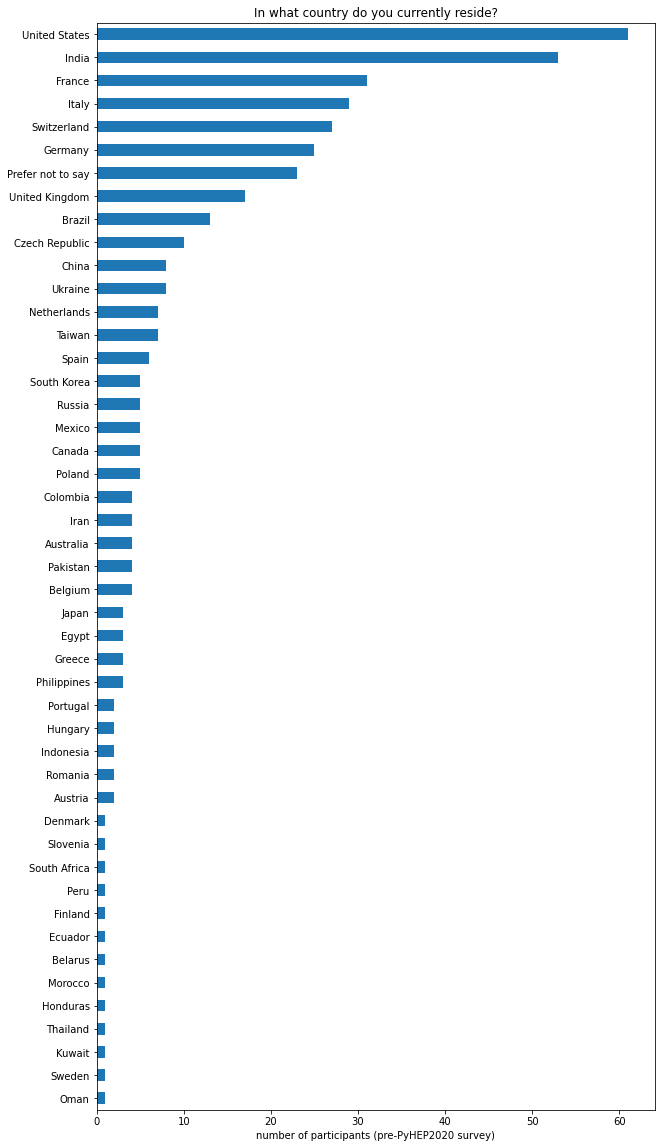

In [18]:
def fix_country_names(name):
    name = " ".join(x.capitalize() for x in str(name).strip(" '\"").split())
    name = {
        "Brasil": "Brazil",
        "Canada (east)": "Canada",
        "Canada (montreal)": "Canada",
        "Ch": "Switzerland",
        "Czech Rep.": "Czech Republic",
        "Czechia": "Czech Republic",
        "France (cern-based)": "France",
        "Greeve": "Greece",
        "México": "Mexico",
        "Netherlands. Time Slot Also Dependent On Another Conference. So Need To Be Able To Attend Both.": "Netherlands",
        "Osaka, Japan": "Japan",
        "Republic Of Korea": "South Korea",
        "Russia Federation": "Russia",
        "S.korea": "South Korea",
        "Stockholm": "Sweden",
        "Taiwan (r.o.c.)": "Taiwan",
        "The Netherlands": "Netherlands",
        "The U.s": "United States",
        "Uk": "United Kingdom",
        "U.s.": "United States",
        "U.s.a.": "United States",
        "United State": "United States",
        "Us": "United States",
        "Us (est)": "United States",
        "Usa": "United States",
        "Usa (chicago)": "United States",
        "Usa - Michigan": "United States",
        "United States Of America": "United States",
        "United Status": "United States",
        "Nan": "Prefer not to say",
    }.get(name, name)
    return name
ax = pre[["PyHEP feedback: In what country do you currently reside?"]].applymap(fix_country_names).iloc[:, 0].value_counts(ascending=True).plot.barh(figsize=(10, 20))
plt.title("In what country do you currently reside?")
plt.xlabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-country-of-residence.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-country-of-residence.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-country-of-residence.png")

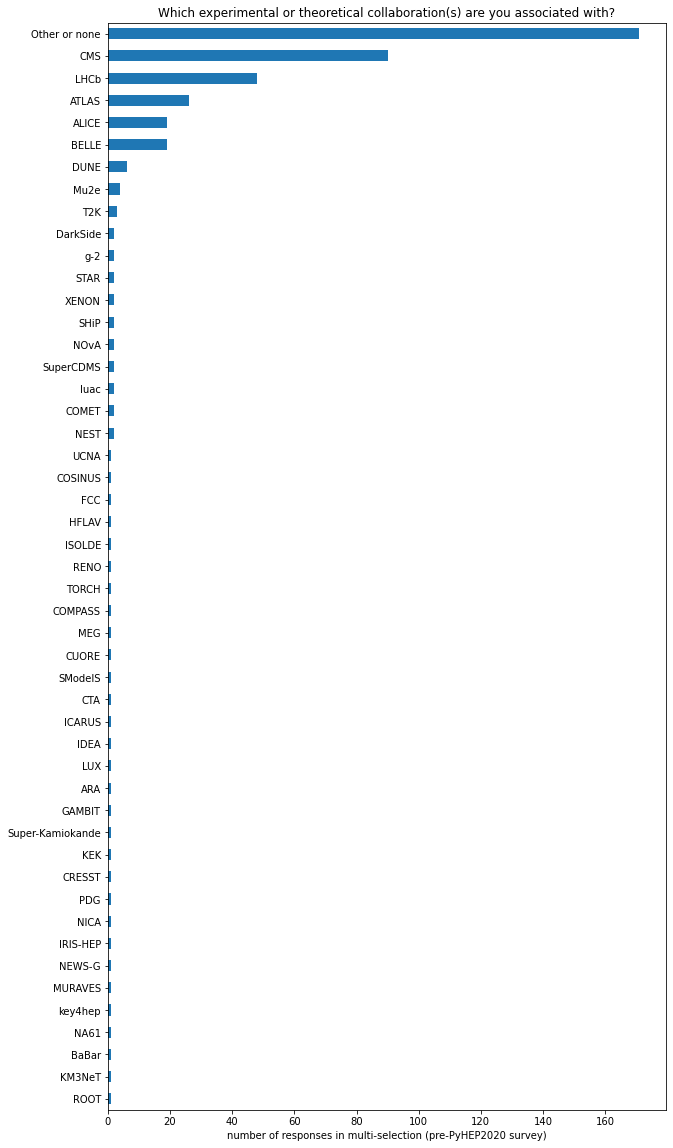

In [19]:
fix_collaboration_names = lambda x: {
    "alice": "ALICE",
    "Alice": "ALICE",
    "ALICE": "ALICE",
    "ALICE member": "ALICE",
    "ATLAS": "ATLAS",
    "ATLAS, BELLE2": "ATLAS;BELLE",
    "ATLAS, Darkside": "ATLAS;DarkSide",
    "ATLAS, FCC, IDEA": "ATLAS;FCC;IDEA",
    "ATLAS, IRIS-HEP": "ATLAS;IRIS-HEP",
    "ATLAS, KM3NeT": "ATLAS;KM3NeT",
    "BaBar, HFLAV, PDG, LHCb, FNAL-E989": "BaBar;HFLAV;PDG;LHCb;g-2",
    "Belle": "BELLE",
    "BELLE": "BELLE",
    "Belle2": "BELLE",
    "Belle, ARA": "BELLE;ARA",
    "Belle / Belle II": "BELLE",
    "Belle, Belle II": "BELLE",
    "belle II": "BELLE",
    "Belle II": "BELLE",
    "Belle II and GAMBIT": "BELLE;GAMBIT",
    "Belle II, CMS": "BELLE;CMS",
    "BELLE I & II": "BELLE",
    "BNL-STAR collaboration": "STAR",
    "cms": "CMS",
    "Cms": "CMS",
    "CMS": "CMS",
    "CMS, ALICE": "CMS;ALICE",
    "CMS, DUNE": "CMS;DUNE",
    "CMS Experiment": "CMS",
    "CMS, SModelS": "CMS;SModelS",
    "COMET": "COMET",
    "COMET MEG": "COMET;MEG",
    "COMPASS": "COMPASS",
    "CRESST, COSINUS": "CRESST;COSINUS",
    "CUORE/CUPID": "CUORE",
    "DarkSide": "DarkSide",
    "DUNE": "DUNE",
    "DUNE (SAND), NICA": "DUNE;NICA",
    "I am currently associated with Belle and Belle 2 experiments.": "BELLE",
    "I am in a team that they are in collaboration with CMS and I am going to join in a CERN group.": "CMS",
    "ICARUS and DUNE": "ICARUS;DUNE",
    "I'm associated with CMS experiment": "CMS",
    "ISOLDE": "ISOLDE",
    "Iuac": "Iuac",
    "Just switched from CMS to CTA": "CTA",
    "KEK": "KEK",
    "key4hep": "key4hep",
    "lhcb": "LHCb",
    "LHCb": "LHCb",
    "LHCb SHiP": "LHCb;SHiP",
    "LHCb, SHiP": "LHCb;SHiP",
    "LHCb, TORCH": "LHCb;TORCH",
    "LUX, NEST": "LUX;NEST",
    "Mu2e": "Mu2e",
    "Mu2e, a few small instrumentation efforts outside Mu2e": "Mu2e",
    "Mu2e, Muon g-2": "Mu2e;g-2",
    "Mu2e, NEWS-G": "Mu2e;NEWS-G",
    "MUon RAdiography of Mt VESuvius (MURAVES)": "MURAVES",
    "NA61/SHINE Experiment": "NA61",
    "NOvA": "NOvA",
    "NOvA, DUNE": "NOvA;DUNE",
    "RENO,BELLE2, etc": "RENO;BELLE",
    "ROOT": "ROOT",
    "STAR": "STAR",
    "SuperCDMS": "SuperCDMS",
    "Super CDMS": "SuperCDMS",
    "Super-Kamiokande, T2K, DUNE": "Super-Kamiokande;T2K;DUNE",
    "T2K": "T2K",
    "UCNA": "UCNA",
    "XENON (direct dark matter search)": "XENON",
    "XENON    NEST": "XENON;NEST",
    "Yes. Belle and Belle II": "BELLE",
    "Yes, Belle II collaboration. :)": "BELLE",
    "yes, CMS": "CMS",
    "Yes: CMS": "CMS",
    "Yes, with ATLAS.": "ATLAS",
}.get(x, "Other or none")
ax = pd.DataFrame(pre[
    ["Professional life: Are you associated with one or more experimental or theoretical collaborations? (E.g. ATLAS, CMS, DUNE, USQCD...)"]
].applymap(fix_collaboration_names).iloc[:, 0].str.split(";").tolist()).stack().value_counts(ascending=True).plot.barh(figsize=(10, 20))
plt.title("Which experimental or theoretical collaboration(s) are you associated with?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-collaboration.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-collaboration.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-collaboration.png")

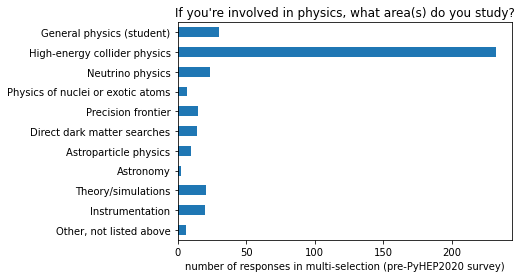

In [20]:
options = [
    "General physics (student)",
    "High-energy collider physics",
    "Neutrino physics",
    "Physics of nuclei or exotic atoms",
    "Precision frontier",
    "Direct dark matter searches",
    "Astroparticle physics",
    "Astronomy",
    "Theory/simulations",
    "Instrumentation",
    "Other, not listed above",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if option in responses else 0.0 for option in options]
exploded = pre[["Professional life: If you're involved in physics, what area(s) do you study?"]].fillna("No response").applymap(explode)
indicator = pd.DataFrame(exploded.iloc[:, 0].tolist(), columns=options)
ax = indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh()
plt.title("If you're involved in physics, what area(s) do you study?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-physics-field.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-physics-field.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-physics-field.png")

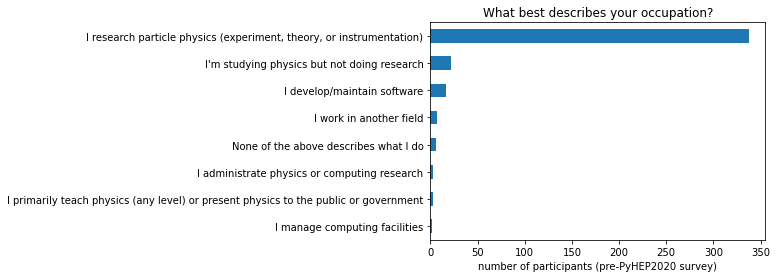

In [21]:
ax = pre["Professional life: What best describes your occupation?"].value_counts(ascending=True).plot.barh()
plt.title("What best describes your occupation?")
plt.xlabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-type-of-occupation.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-type-of-occupation.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-type-of-occupation.png")

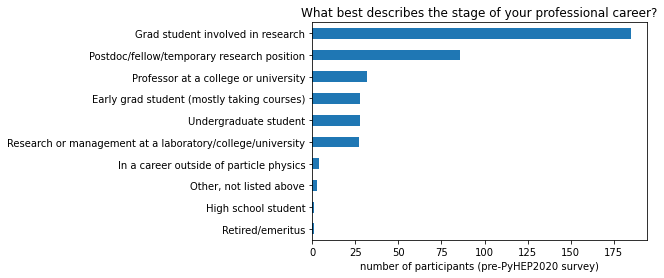

In [22]:
ax = pre["Professional life: What best describes the stage of your professional career?"].value_counts(ascending=True).plot.barh()
plt.title("What best describes the stage of your professional career?")
plt.xlabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-stage-of-career.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-stage-of-career.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-stage-of-career.png")

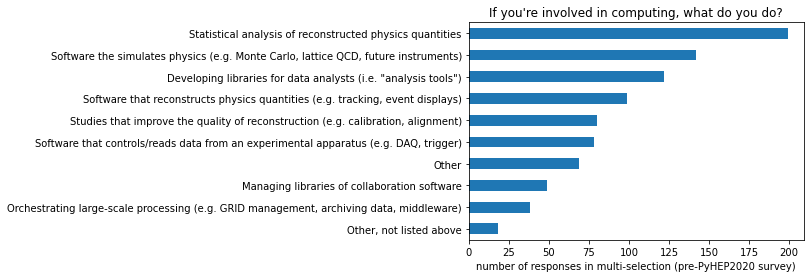

In [23]:
ax = pd.DataFrame(pre["Professional life: If you're involved in computing, what do you do?"].fillna("Other").str.split("; ").tolist()).stack().value_counts(ascending=True).plot.barh()
plt.title("If you're involved in computing, what do you do?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-type-of-computing.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-type-of-computing.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-type-of-computing.png")

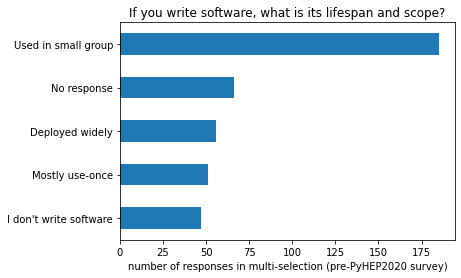

In [24]:
ax = pd.DataFrame(pre['Professional life: If you write software, what is its lifespan and scope?'].fillna("No response").str.split("; ").tolist()).stack().value_counts(ascending=True).plot.barh()
plt.title("If you write software, what is its lifespan and scope?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-scope-of-computing.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-scope-of-computing.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-scope-of-computing.png")

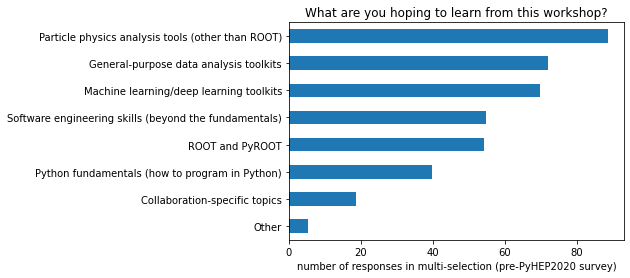

In [25]:
hopes = [
    "Particle physics analysis tools (other than ROOT)",
    "General-purpose data analysis toolkits",
    "Machine learning/deep learning toolkits",
    "Software engineering skills (beyond the fundamentals)",
    "ROOT and PyROOT",
    "Python fundamentals (how to program in Python)",
    "Collaboration-specific topics",
    "Other",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if hope in responses else 0.0 for hope in hopes]
exploded = pre[["PyHEP feedback: What are you hoping to learn from this workshop?"]].fillna("No response").applymap(explode)
indicator = pd.DataFrame(exploded.iloc[:, 0].tolist(), columns=hopes)
ax = indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh()
plt.title("What are you hoping to learn from this workshop?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-hopes-for-pyhep2020.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-hopes-for-pyhep2020.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-hopes-for-pyhep2020.png")

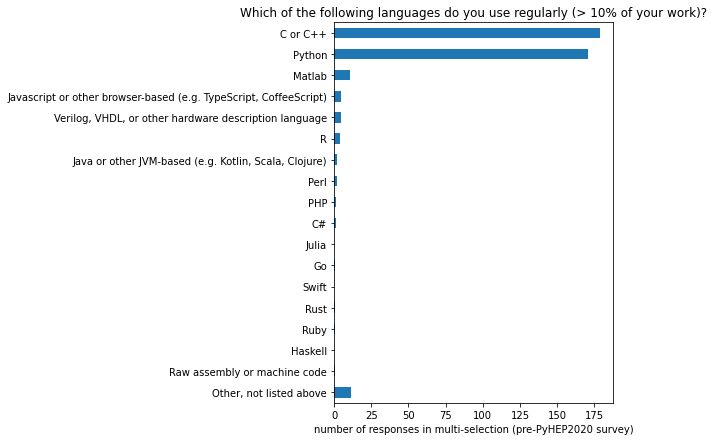

In [26]:
languages = [
    "C or C++",
    "Python",
    "Matlab",
    "Javascript or other browser-based (e.g. TypeScript, CoffeeScript)",
    "Verilog, VHDL, or other hardware description language",
    "R",
    "Java or other JVM-based (e.g. Kotlin, Scala, Clojure)",
    "Perl",
    "PHP",
    "C#",
    "Julia",
    "Go",
    "Swift",
    "Rust",
    "Ruby",
    "Haskell",
    "Raw assembly or machine code",
    "Other, not listed above",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if language in responses else 0.0 for language in languages]
exploded = pre[["Computing and programming: Which of the following languages do you use regularly (i.e. more than 10% of your work)?"]].fillna("").applymap(explode)
indicator = pd.DataFrame(exploded.iloc[:, 0].tolist(), columns=languages)
ax = indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh(figsize=(5, 7))
plt.title("Which of the following languages do you use regularly (> 10% of your work)?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-programming-languages.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-programming-languages.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-programming-languages.png")

,C or C++,Python
C or C++,1.000000,0.693827
Python,0.693827,1.000000


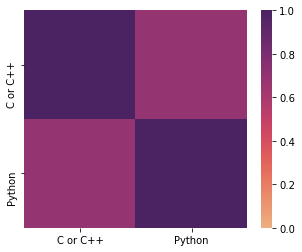

In [27]:
options = [
    "C or C++",
    "Python",
]
def mapping_options(x):
    s = x.split("; ")
    return "; ".join(["1" if y in s else "0" for y in options])

tmp = pre[["Computing and programming: Which of the following languages do you use regularly (i.e. more than 10% of your work)?"]].fillna("No response").applymap(mapping_options).iloc[:, 0].str.split("; ", expand=True).astype(int)
tmp.columns = options
correlation = tmp.corr(lambda x, y: (x * y).sum() / len(x))

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    cmap=sns.color_palette("flare", as_cmap=True),
    norm=matplotlib.colors.Normalize(0, 1),
)
ax.get_figure().savefig("PLOTS-pyhep/pyhep-programming-languages-correlation.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-programming-languages-correlation.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-programming-languages-correlation.png")

correlation

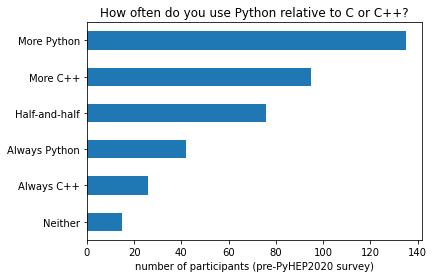

In [28]:
ax = pre['Computing and programming: About how often do you use Python relative to C or C++?'].value_counts(ascending=True).plot.barh()
plt.title("How often do you use Python relative to C or C++?")
plt.xlabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-python-relative-to-cpp.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-python-relative-to-cpp.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-python-relative-to-cpp.png")

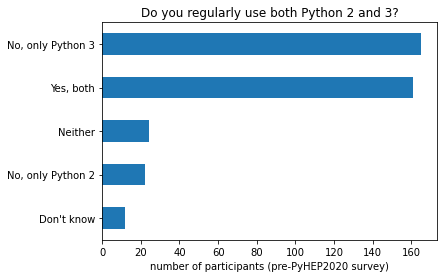

In [29]:
ax = pre['Computing and programming: Do you regularly use both Python 2 and 3 (more than 10% of the time each)?'].value_counts(ascending=True).plot.barh()
plt.title("Do you regularly use both Python 2 and 3?")
plt.xlabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-python-2-vs-3.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-python-2-vs-3.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-python-2-vs-3.png")

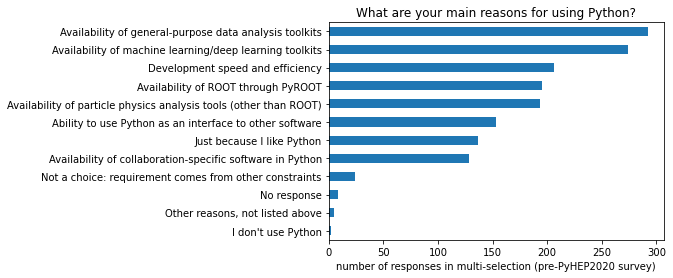

In [30]:
ax = pd.DataFrame(pre['Computing and programming: What are your main reasons for using Python?'].fillna("No response").str.split("; ").tolist()).stack().value_counts(ascending=True).plot.barh()
plt.title("What are your main reasons for using Python?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-reasons-for-using-python.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-reasons-for-using-python.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-reasons-for-using-python.png")

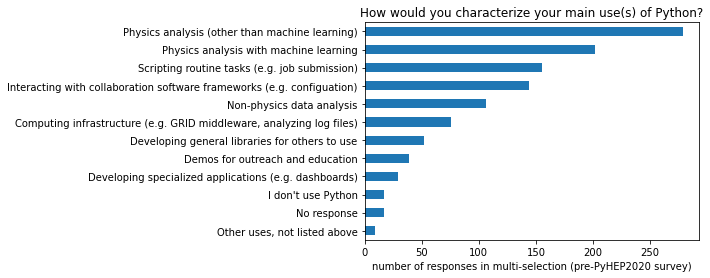

In [31]:
ax = pd.DataFrame(pre['Computing and programming: How would you characterize your main use(s) of Python?'].fillna("No response").str.split("; ").tolist()).stack().value_counts(ascending=True).plot.barh()
plt.title("How would you characterize your main use(s) of Python?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-main-use-of-python.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-main-use-of-python.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-main-use-of-python.png")

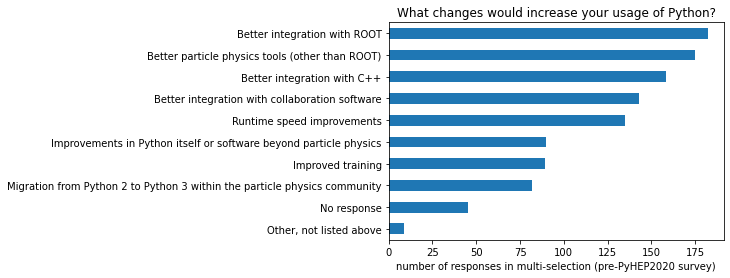

In [32]:
ax = pd.DataFrame(pre['Computing and programming: What changes would increase your usage of Python?'].fillna("No response").str.split("; ").tolist()).stack().value_counts(ascending=True).plot.barh()
plt.title("What changes would increase your usage of Python?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-what-would-change-use-of-python.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-what-would-change-use-of-python.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-what-would-change-use-of-python.png")

,Better integration with ROOT,Better particle physics tools (other than ROOT),Better integration with C++,Better integration with collaboration software,Runtime speed improvements,Improvements in Python itself or software beyond particle physics,Improved training,Migration from Python 2 to Python 3 within the particle physics community,"Other, not listed above",No response
Better integration with ROOT,1.000000,0.254321,0.276543,0.241975,0.170370,0.108642,0.096296,0.118519,0.000000,0.0
Better particle physics tools (other than ROOT),0.254321,1.000000,0.212346,0.209877,0.153086,0.138272,0.123457,0.128395,0.000000,0.0
Better integration with C++,0.276543,0.212346,1.000000,0.185185,0.150617,0.113580,0.096296,0.108642,0.002469,0.0
Better integration with collaboration software,0.241975,0.209877,0.185185,1.000000,0.128395,0.111111,0.091358,0.093827,0.000000,0.0
Runtime speed improvements,0.170370,0.153086,0.150617,0.128395,1.000000,0.101235,0.091358,0.093827,0.000000,0.0
Improvements in Python itself or software beyond particle physics,0.108642,0.138272,0.113580,0.111111,0.101235,1.000000,0.074074,0.051852,0.002469,0.0
Improved training,0.096296,0.123457,0.096296,0.091358,0.091358,0.074074,1.000000,0.059259,0.002469,0.0
Migration from Python 2 to Python 3 within the particle physics community,0.118519,0.128395,0.108642,0.093827,0.093827,0.051852,0.059259,1.000000,0.002469,0.0
"Other, not listed above",0.000000,0.000000,0.002469,0.000000,0.000000,0.002469,0.002469,0.002469,1.000000,0.0
No response,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


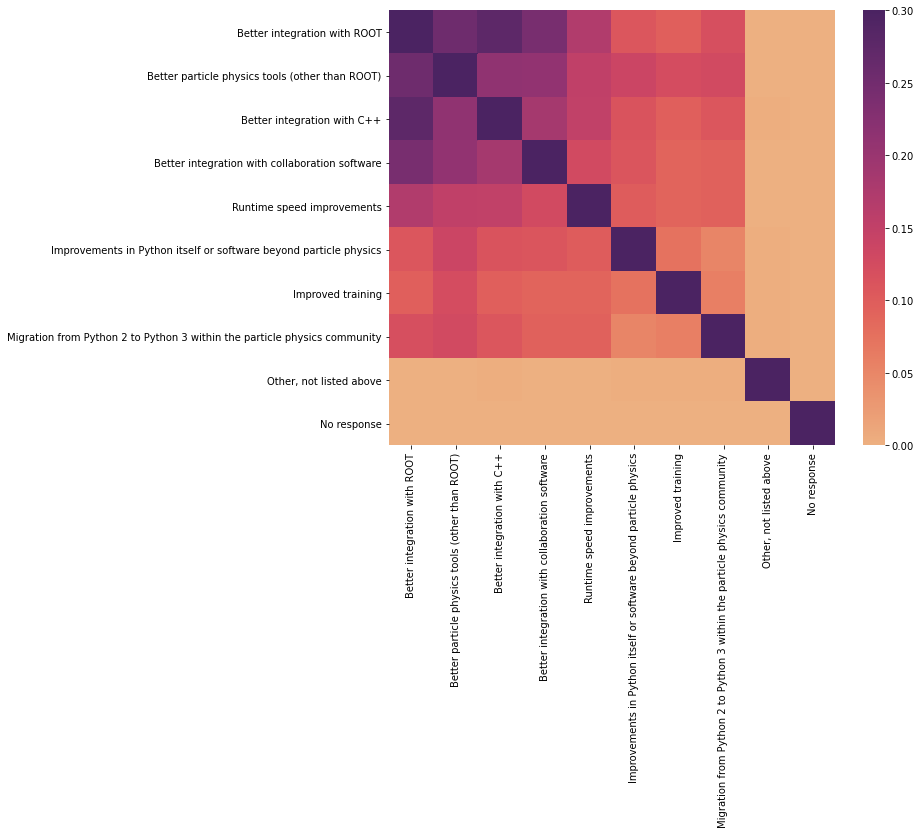

In [33]:
options = [
    "Better integration with ROOT",
    "Better particle physics tools (other than ROOT)",
    "Better integration with C++",
    "Better integration with collaboration software",
    "Runtime speed improvements",
    "Improvements in Python itself or software beyond particle physics",
    "Improved training",
    "Migration from Python 2 to Python 3 within the particle physics community",
    "Other, not listed above",
    "No response",
]
def mapping_options(x):
    s = x.split("; ")
    return "; ".join(["1" if y in s else "0" for y in options])

tmp = pre[['Computing and programming: What changes would increase your usage of Python?']].fillna("No response").applymap(mapping_options).iloc[:, 0].str.split("; ", expand=True).astype(int)
tmp.columns = options
correlation = tmp.corr(lambda x, y: (x * y).sum() / len(x))

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    cmap=sns.color_palette("flare", as_cmap=True),
    norm=matplotlib.colors.Normalize(0, 0.30),
)
ax.get_figure().savefig("PLOTS-pyhep/pyhep-what-would-change-use-of-python-correlation.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-what-would-change-use-of-python-correlation.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-what-would-change-use-of-python-correlation.png")

correlation

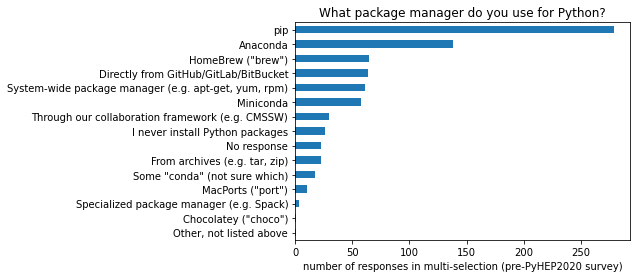

In [34]:
ax = pd.DataFrame(pre['Computing and programming: What package manager do you regularly use to install *Python packages* (numpy, etc.)?'].fillna("No response").str.split("; ").tolist()).stack().value_counts(ascending=True).plot.barh()
plt.title("What package manager do you use for Python?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-package-manager-for-python.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-package-manager-for-python.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-package-manager-for-python.png")

,pip,Anaconda,Miniconda,"Some ""conda"" (not sure which)","HomeBrew (""brew"")","MacPorts (""port"")","Chocolatey (""choco"")",Directly from GitHub/GitLab/BitBucket,"System-wide package manager (e.g. apt-get, yum, rpm)",Through our collaboration framework (e.g. CMSSW),"From archives (e.g. tar, zip)",Specialized package manager (e.g. Spack),"Other, not listed above",I never install Python packages,No response
pip,1.000000,0.224691,0.120988,0.029630,0.143210,0.014815,0.002469,0.128395,0.118519,0.051852,0.041975,0.002469,0.002469,0.002469,0.0
Anaconda,0.224691,1.000000,0.037037,0.009877,0.046914,0.002469,0.000000,0.056790,0.049383,0.019753,0.019753,0.000000,0.000000,0.000000,0.0
Miniconda,0.120988,0.037037,1.000000,0.002469,0.041975,0.002469,0.000000,0.037037,0.024691,0.009877,0.009877,0.000000,0.002469,0.002469,0.0
"Some ""conda"" (not sure which)",0.029630,0.009877,0.002469,1.000000,0.004938,0.000000,0.000000,0.012346,0.012346,0.004938,0.007407,0.000000,0.000000,0.000000,0.0
"HomeBrew (""brew"")",0.143210,0.046914,0.041975,0.004938,1.000000,0.017284,0.000000,0.051852,0.037037,0.027160,0.024691,0.000000,0.002469,0.000000,0.0
"MacPorts (""port"")",0.014815,0.002469,0.002469,0.000000,0.017284,1.000000,0.000000,0.004938,0.009877,0.004938,0.004938,0.002469,0.000000,0.000000,0.0
"Chocolatey (""choco"")",0.002469,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.002469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Directly from GitHub/GitLab/BitBucket,0.128395,0.056790,0.037037,0.012346,0.051852,0.004938,0.002469,1.000000,0.061728,0.034568,0.032099,0.000000,0.000000,0.002469,0.0
"System-wide package manager (e.g. apt-get, yum, rpm)",0.118519,0.049383,0.024691,0.012346,0.037037,0.009877,0.000000,0.061728,1.000000,0.034568,0.022222,0.004938,0.000000,0.000000,0.0
Through our collaboration framework (e.g. CMSSW),0.051852,0.019753,0.009877,0.004938,0.027160,0.004938,0.000000,0.034568,0.034568,1.000000,0.007407,0.002469,0.000000,0.002469,0.0


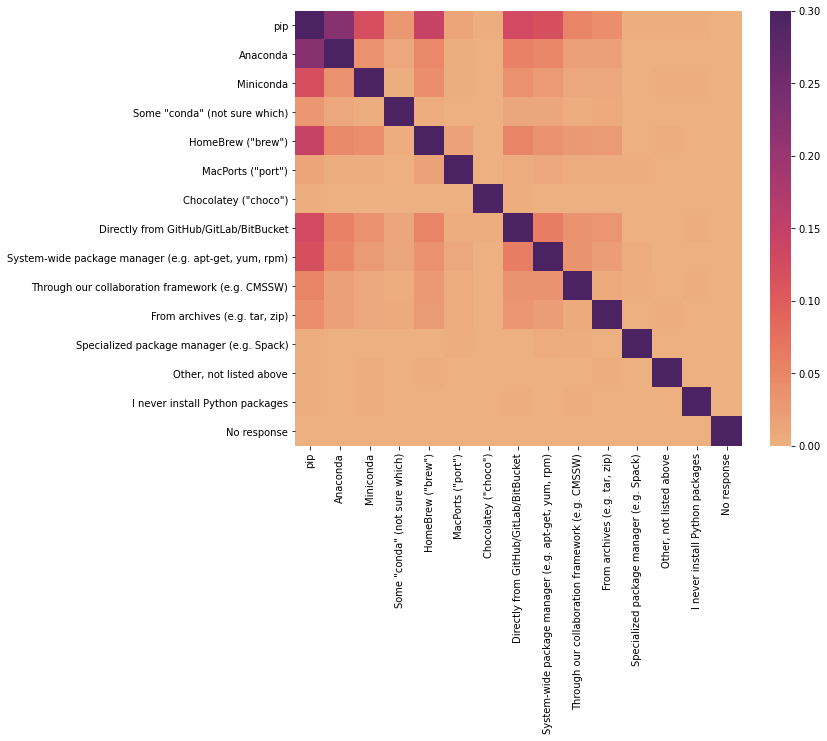

In [35]:
options = [
    'pip',
    'Anaconda',
    'Miniconda',
    'Some "conda" (not sure which)',
    'HomeBrew ("brew")',
    'MacPorts ("port")',
    'Chocolatey ("choco")',
    'Directly from GitHub/GitLab/BitBucket',
    'System-wide package manager (e.g. apt-get, yum, rpm)',
    'Through our collaboration framework (e.g. CMSSW)',
    'From archives (e.g. tar, zip)',
    'Specialized package manager (e.g. Spack)',
    'Other, not listed above',
    'I never install Python packages',
    "No response", 
]
def mapping_options(x):
    s = x.split("; ")
    return "; ".join(["1" if y in s else "0" for y in options])

tmp = pre[['Computing and programming: What package manager do you regularly use to install *Python packages* (numpy, etc.)?']].fillna("No response").applymap(mapping_options).iloc[:, 0].str.split("; ", expand=True).astype(int)
tmp.columns = options
correlation = tmp.corr(lambda x, y: (x * y).sum() / len(x))

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    cmap=sns.color_palette("flare", as_cmap=True),
    norm=matplotlib.colors.Normalize(0, 0.30),
)
ax.get_figure().savefig("PLOTS-pyhep/pyhep-package-manager-for-python-correlation.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-package-manager-for-python-correlation.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-package-manager-for-python-correlation.png")

correlation

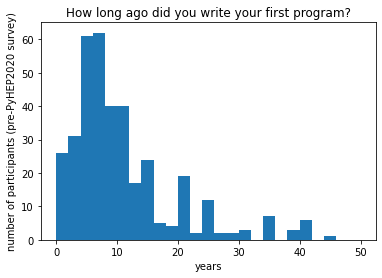

In [36]:
ax = pre['Computing and programming: Approximately how many years ago did you write your first program (zero for never)?'].plot.hist(bins=25, range=(0, 50))
plt.title("How long ago did you write your first program?")
plt.xlabel("years")
plt.ylabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-years-since-first-program.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-years-since-first-program.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-years-since-first-program.png")

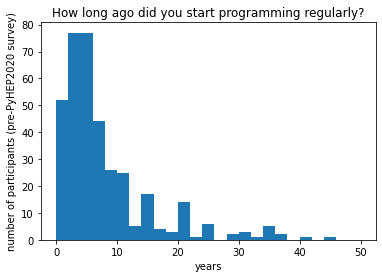

In [37]:
ax = pre['Computing and programming: Approximately how many years ago did you start programming regularly (zero for never)?'].plot.hist(bins=25, range=(0, 50))
plt.title("How long ago did you start programming regularly?")
plt.xlabel("years")
plt.ylabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-years-since-programming-regularly.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-years-since-programming-regularly.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-years-since-programming-regularly.png")

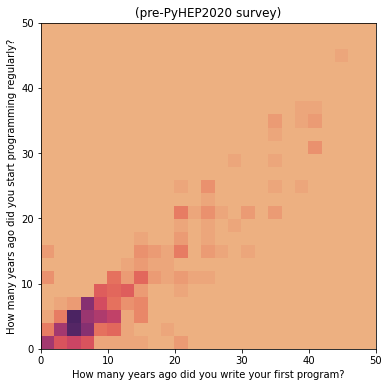

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.hist2d(
    pre['Computing and programming: Approximately how many years ago did you write your first program (zero for never)?'],
    pre['Computing and programming: Approximately how many years ago did you start programming regularly (zero for never)?'],
    bins=(25, 25),
    range=((0, 50), (0, 50)),
    cmap="flare"
)
plt.title("(pre-PyHEP2020 survey)")
plt.xlabel("How many years ago did you write your first program?")
plt.ylabel("How many years ago did you start programming regularly?")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-years-programming-2d.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-years-programming-2d.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-years-programming-2d.png")

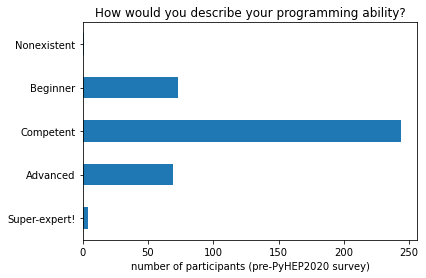

In [39]:
ax = pre['Computing and programming: How would you describe your programming ability?'].value_counts().iloc[[3, 2, 0, 1, 4]].plot.barh()
plt.title("How would you describe your programming ability?")
plt.xlabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-programming-ability-self-described.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-programming-ability-self-described.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-programming-ability-self-described.png")

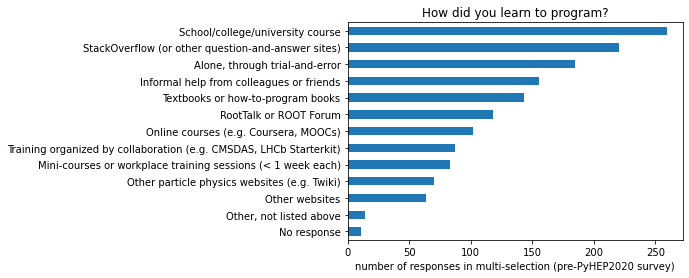

In [40]:
ax = pd.DataFrame(pre['Computing and programming: How did you learn to program? (Which were the most significant?)'].fillna("No response").str.split("; ").tolist()).stack().value_counts(ascending=True).plot.barh()
plt.title("How did you learn to program?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-how-did-you-learn-to-program.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-how-did-you-learn-to-program.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-how-did-you-learn-to-program.png")

,School/college/university course,StackOverflow (or other question-and-answer sites),"Alone, through trial-and-error",Informal help from colleagues or friends,Textbooks or how-to-program books,RootTalk or ROOT Forum,"Online courses (e.g. Coursera, MOOCs)","Training organized by collaboration (e.g. CMSDAS, LHCb Starterkit)",Mini-courses or workplace training sessions (< 1 week each),Other particle physics websites (e.g. Twiki),Other websites,"Other, not listed above",No response
School/college/university course,1.000000,0.370370,0.251852,0.222222,0.234568,0.197531,0.175309,0.140741,0.158025,0.123457,0.111111,0.019753,0.0
StackOverflow (or other question-and-answer sites),0.370370,1.000000,0.308642,0.288889,0.217284,0.207407,0.153086,0.140741,0.138272,0.123457,0.128395,0.019753,0.0
"Alone, through trial-and-error",0.251852,0.308642,1.000000,0.259259,0.155556,0.155556,0.098765,0.086420,0.079012,0.081481,0.103704,0.019753,0.0
Informal help from colleagues or friends,0.222222,0.288889,0.259259,1.000000,0.135802,0.153086,0.101235,0.098765,0.088889,0.086420,0.076543,0.014815,0.0
Textbooks or how-to-program books,0.234568,0.217284,0.155556,0.135802,1.000000,0.120988,0.103704,0.091358,0.083951,0.091358,0.074074,0.017284,0.0
RootTalk or ROOT Forum,0.197531,0.207407,0.155556,0.153086,0.120988,1.000000,0.061728,0.093827,0.086420,0.111111,0.049383,0.009877,0.0
"Online courses (e.g. Coursera, MOOCs)",0.175309,0.153086,0.098765,0.101235,0.103704,0.061728,1.000000,0.064198,0.079012,0.049383,0.049383,0.007407,0.0
"Training organized by collaboration (e.g. CMSDAS, LHCb Starterkit)",0.140741,0.140741,0.086420,0.098765,0.091358,0.093827,0.064198,1.000000,0.083951,0.079012,0.049383,0.002469,0.0
Mini-courses or workplace training sessions (< 1 week each),0.158025,0.138272,0.079012,0.088889,0.083951,0.086420,0.079012,0.083951,1.000000,0.069136,0.041975,0.004938,0.0
Other particle physics websites (e.g. Twiki),0.123457,0.123457,0.081481,0.086420,0.091358,0.111111,0.049383,0.079012,0.069136,1.000000,0.044444,0.007407,0.0


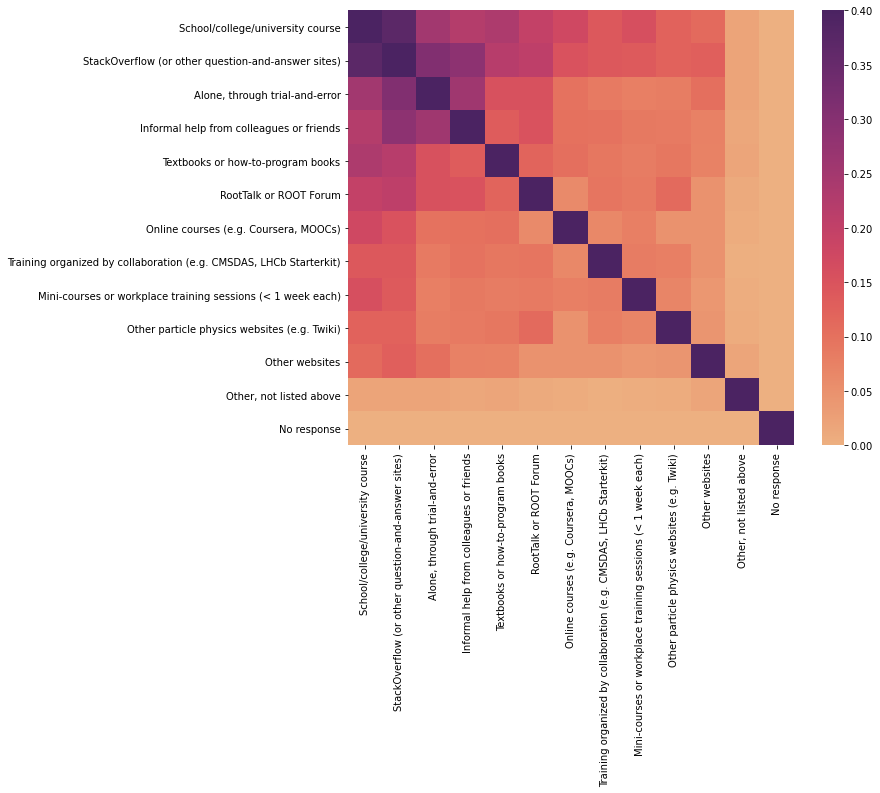

In [41]:
options = [
    'School/college/university course',
    'StackOverflow (or other question-and-answer sites)',
    'Alone, through trial-and-error',
    'Informal help from colleagues or friends',
    'Textbooks or how-to-program books',
    'RootTalk or ROOT Forum',
    'Online courses (e.g. Coursera, MOOCs)',
    'Training organized by collaboration (e.g. CMSDAS, LHCb Starterkit)',
    'Mini-courses or workplace training sessions (< 1 week each)',
    'Other particle physics websites (e.g. Twiki)',
    'Other websites',
    'Other, not listed above',
    'No response',
]
def mapping_options(x):
    s = x.split("; ")
    return "; ".join(["1" if y in s else "0" for y in options])

tmp = pre[['Computing and programming: How did you learn to program? (Which were the most significant?)']].fillna("No response").applymap(mapping_options).iloc[:, 0].str.split("; ", expand=True).astype(int)
tmp.columns = options
correlation = tmp.corr(lambda x, y: (x * y).sum() / len(x))

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    cmap=sns.color_palette("flare", as_cmap=True),
    norm=matplotlib.colors.Normalize(0, 0.40),
)
ax.get_figure().savefig("PLOTS-pyhep/pyhep-how-did-you-learn-to-program-correlation.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-how-did-you-learn-to-program-correlation.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-how-did-you-learn-to-program-correlation.png")

correlation

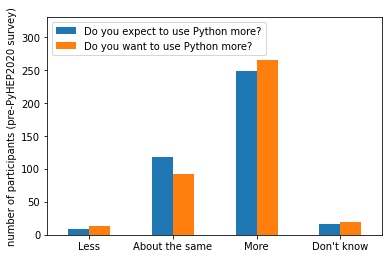

In [42]:
ax = pre[[
    "Computing and programming: Do you *expect* to use Python more or less in the future (as a fraction of your programming time)?",
    "Computing and programming: Do you *want* to use Python more or less in the future (as a fraction of your programming time)?"
]].apply(pd.Series.value_counts).loc[["Less", "About the same", "More", "Don't know"]].plot.bar(rot=0)
plt.legend(["Do you expect to use Python more?", "Do you want to use Python more?"], loc="upper left")
plt.ylim(0, 330)
plt.ylabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-expect-to-use-python-more.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-expect-to-use-python-more.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-expect-to-use-python-more.png")

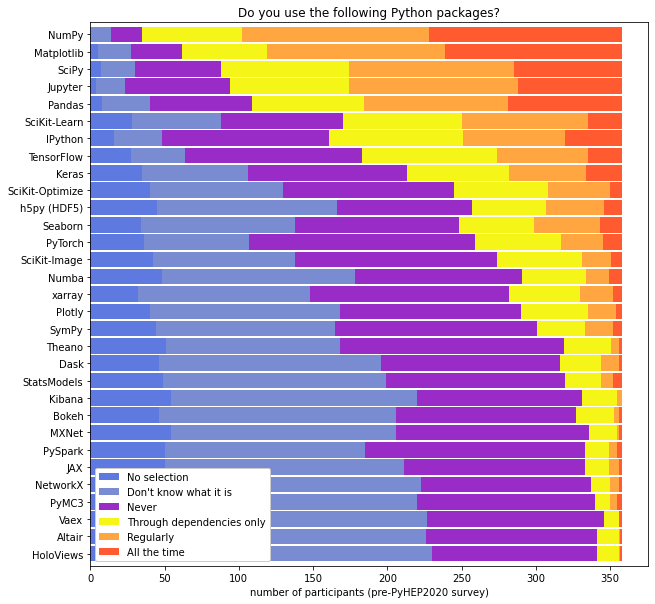

In [43]:
cols = {x: x.split(":")[1].strip() for x in pre.columns if x.startswith("Python ecosystem:") and "?" not in x}
order = ((pre[list(cols)] == "Don't know what it is") | (pre[list(cols)] == "Never")).sum(axis=0).sort_values(ascending=False).index.tolist()
pkgs = pre[order].rename(columns=cols).apply(pd.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
ax = pkgs.plot.barh(stacked=True, width=0.9, figsize=(10, 10), color=["#5e79e0", "#798bd1", "#992cc7", "#f5f518", "#ffa640", "#ff5a30"])
plt.legend(loc="lower left", framealpha=1)
plt.title("Do you use the following Python packages?")
plt.xlabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-use-of-python-packages.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-use-of-python-packages.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-use-of-python-packages.png")

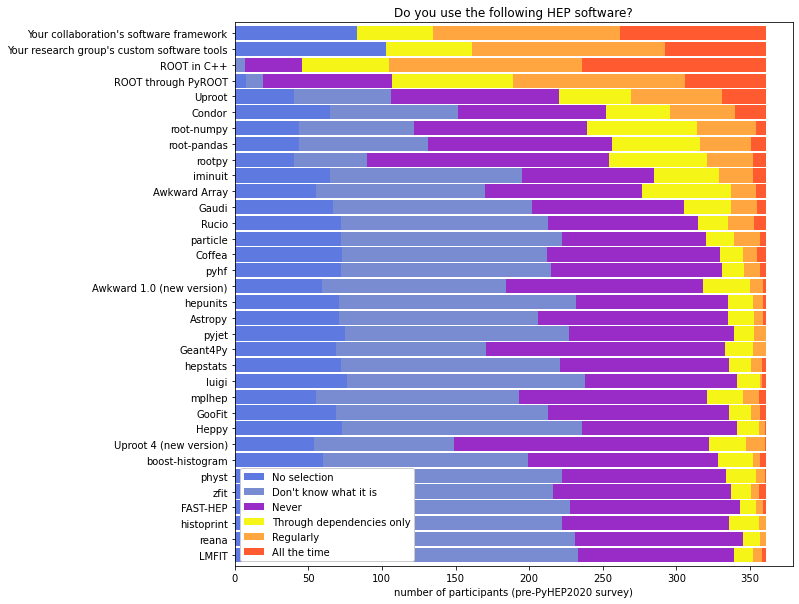

In [44]:
cols = {x: x.split(":")[1].strip() for x in pre.columns if x.startswith("Particle physics ecosystem:") and "?" not in x}
order = ((pre[list(cols)] == "Don't know what it is") | (pre[list(cols)] == "Never")).sum(axis=0).sort_values(ascending=False).index.tolist()
pkgs = pre[order].rename(columns=cols).apply(pd.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
ax = pkgs.plot.barh(stacked=True, width=0.9, figsize=(10, 10), color=["#5e79e0", "#798bd1", "#992cc7", "#f5f518", "#ffa640", "#ff5a30"])
plt.legend(loc="lower left", framealpha=1)
plt.title("Do you use the following HEP software?")
plt.xlabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-use-of-hep-packages.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-use-of-hep-packages.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-use-of-hep-packages.png")

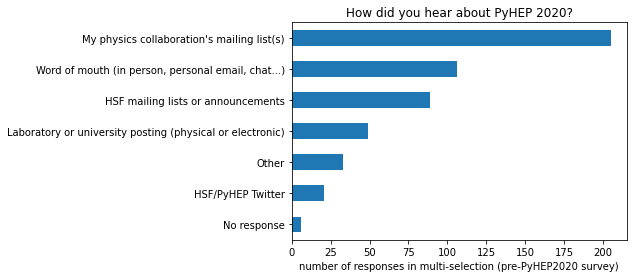

In [45]:
ax = pd.DataFrame(pre['PyHEP feedback: How did you hear about this workshop?'].fillna("No response").str.split("; ").tolist()).stack().value_counts(ascending=True).plot.barh()
plt.title("How did you hear about PyHEP 2020?")
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-how-did-you-hear-about-pyhep.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-how-did-you-hear-about-pyhep.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-how-did-you-hear-about-pyhep.png")

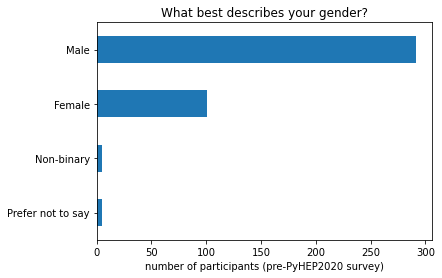

In [46]:
ax = pre['Personal demographics: What best describes your gender?'].value_counts(ascending=True).plot.barh()
plt.title("What best describes your gender?")
plt.xlabel("number of participants (pre-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-gender.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-gender.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-gender.png")

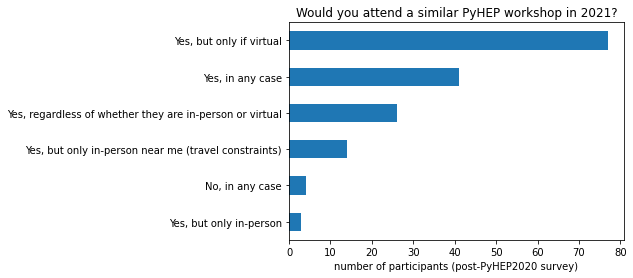

In [47]:
ax = post['Future activities: Would you attend a similar PyHEP workshop next year?'].value_counts(ascending=True).plot.barh()
plt.title("Would you attend a similar PyHEP workshop in 2021?")
plt.xlabel("number of participants (post-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-interest-in-future-pyhep.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-interest-in-future-pyhep.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-interest-in-future-pyhep.png")

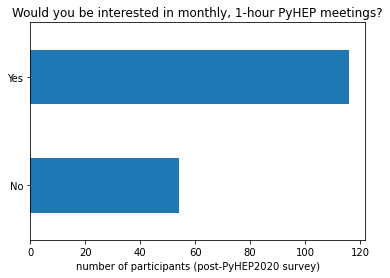

In [48]:
ax = post['Future activities: Would you be interested in monthly, 1-hour PyHEP meetings?'].value_counts(ascending=True).plot.barh()
plt.title("Would you be interested in monthly, 1-hour PyHEP meetings?")
plt.xlabel("number of participants (post-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-interest-in-future-regular-meetings.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-interest-in-future-regular-meetings.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-interest-in-future-regular-meetings.png")

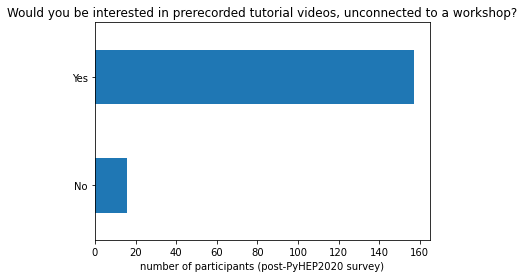

In [49]:
ax = post['Future activities: Would you be interested in prerecorded tutorial videos, like the ones presented at PyHEP, but unconnected to a workshop?'].value_counts(ascending=True).plot.barh()
plt.title("Would you be interested in prerecorded tutorial videos, unconnected to a workshop?")
plt.xlabel("number of participants (post-PyHEP2020 survey)")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-interest-in-disconnected-tutorials.svg")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-interest-in-disconnected-tutorials.pdf")
ax.get_figure().savefig("PLOTS-pyhep/pyhep-interest-in-disconnected-tutorials.png")